In [8]:
# Importing necessary libraries
import os  # Operating system functionalities
import librosa  # Audio processing library
import wave  # Module for reading and writing WAV files
import numpy as np  # Numerical operations library
import pandas as pd  # Data manipulation library
import matplotlib.pyplot as plt  # Plotting library

# Importing components for Dividing into the Training Set and the Testing Set
from sklearn.model_selection import train_test_split  # Splitting the dataset for training and testing

# Importing components for Long Short-Term Memory (LSTM) Classifier
import keras  # High-level neural networks API
from tensorflow.keras.utils import to_categorical  # Utility for one-hot encoding
from keras.models import Sequential  # Sequential model for stacking layers
from keras.layers import *  # Different layers for building neural networks
from tensorflow.keras.optimizers import RMSprop

In [9]:
def extract_mfcc(wav_file_name):
    '''This function retrieves the mean of MFCC features from an input WAV file located 
    at the specified path. The input is the path to the WAV file, and the output is 
    the resulting MFCC features.'''
    
    # Loading the WAV file using librosa and obtaining the audio signal (y) and sampling rate (sr)
    y, sr = librosa.load(wav_file_name)
    
    # Extracting MFCC features with a total of 40 coefficients, and computing the mean across dimensions
    mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    
    # Returning the resulting MFCC features
    return mfccs

In [10]:
import os

In [24]:
# Lists to store labels and extracted MFCC features for the Ravdess emotional speech dataset
ravdess_speech_labels = []  
ravdess_speech_data = []

# Iterating through all the files in the archive directory
for dirname, _, filenames in os.walk('/Users/violinadoley/Downloads/archive'):
    for filename in filenames:
        # Ensure the file is a WAV file
        if filename.endswith('.wav'):
            # Extracting emotion label from the filename and converting to an integer
            ravdess_speech_labels.append(int(filename[7:8]) - 1)
            
            # Obtaining the full path of the WAV file
            wav_file_name = os.path.join(dirname, filename)
            
            # Extracting MFCC features from the WAV file using the previously defined function
            ravdess_speech_data.append(extract_mfcc(wav_file_name))


In [25]:
# Converting the list of MFCC features into a NumPy array
ravdess_speech_data_array = np.asarray(ravdess_speech_data)

# Converting the list of emotion labels into a NumPy array
ravdess_speech_label_array = np.array(ravdess_speech_labels)

# Converting the integer labels into categorical format using one-hot encoding
labels_categorical = to_categorical(ravdess_speech_label_array)

# Displaying the shapes of the MFCC data array and the categorical label array
ravdess_speech_data_array.shape, labels_categorical.shape


((2880, 40), (2880, 8))

In [26]:
# Splitting the dataset into training and testing sets using train_test_split
x_train, x_test, y_train, y_test = train_test_split(np.array(ravdess_speech_data_array),
                                                    labels_categorical, test_size=0.2,
                                                    random_state=9)

# Calculating the total number of samples in the dataset
number_of_samples = ravdess_speech_data_array.shape[0]

# Determining the number of samples for training, validation, and testing sets
training_samples = int(number_of_samples * 0.8)
validation_samples = int(number_of_samples * 0.1)
test_samples = int(number_of_samples * 0.1)

In [27]:
# Function to create an LSTM model for Speech Emotion Recognition

def create_model_LSTM():
    # Initializing a sequential model
    model = Sequential()
    
    # Adding an LSTM layer with 128 units, not returning sequences, and input shape of (40, 1)
    model.add(LSTM(128, return_sequences=False, input_shape=(40, 1)))
    
    # Adding a Dense layer with 64 units
    model.add(Dense(64))
    
    # Adding a Dropout layer with a dropout rate of 40%
    model.add(Dropout(0.4))
    
    # Adding an Activation layer with ReLU activation function
    model.add(Activation('relu'))
    
    # Adding another Dense layer with 32 units
    model.add(Dense(32))
    
    # Adding a Dropout layer with a dropout rate of 40%
    model.add(Dropout(0.4))
    
    # Adding an Activation layer with ReLU activation function
    model.add(Activation('relu'))
    
    # Adding another Dense layer with 8 units
    model.add(Dense(8))
    
    # Adding an Activation layer with softmax activation function for multiclass classification
    model.add(Activation('softmax'))
    
    # Compiling the model with categorical crossentropy loss, Adam optimizer, and accuracy metric
    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

    
    # Returning the compiled model
    model.summary()
    return model

In [28]:
LSTM_model = create_model_LSTM()

/Users/violinadoley/Desktop/Navarasa/navarasa/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 128)            │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 8)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 77,160 (301.41 KB)

 Trainable params: 77,160 (301.41 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
LSTM_model_history = LSTM_model.fit(np.expand_dims(ravdess_speech_data_array[:training_samples],-1), 
                                    labels_categorical[:training_samples], 
                                    validation_data=(np.expand_dims(ravdess_speech_data_array[training_samples:training_samples+validation_samples], -1), 
                                                                                            labels_categorical[training_samples:training_samples+validation_samples]), epochs=121, shuffle=True)

Epoch 1/121
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.1588 - loss: 2.0694 - val_accuracy: 0.2153 - val_loss: 2.0303
Epoch 2/121
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.1839 - loss: 2.0201 - val_accuracy: 0.1771 - val_loss: 1.9783
Epoch 3/121
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.2186 - loss: 1.9813 - val_accuracy: 0.2743 - val_loss: 1.9000
Epoch 4/121
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.2341 - loss: 1.9136 - val_accuracy: 0.2674 - val_loss: 1.8784
Epoch 5/121
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.2796 - loss: 1.8743 - val_accuracy: 0.2986 - val_loss: 1.8031
Epoch 6/121
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.2872 - loss: 1.8513 - val_accuracy: 0.3194 - val_loss: 1.8227
Epoch 7/121
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.2739 - loss: 1.8427 - val_accuracy: 0.2986 - val_loss: 1.8083
Epoch 8/121
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.2796 - loss: 1.8135 - val_accuracy: 0.

In [30]:
def plot_metric(model_training_history, metric_name_1, metric_name_2, plot_name):
    '''
    This function is designed to create a graph displaying the provided metrics.
    Parameters:
        model_training_history: A history object containing recorded training and validation 
                                loss values and metric values across consecutive epochs.
        metric_name_1:          The name of the first metric to be visualized in the graph.
        metric_name_2:          The name of the second metric to be visualized in the graph.
        plot_name:              The title of the graph.
    '''
    # Extract metric values from the training history.
    metric_value_1 = model_training_history.history[metric_name_1]
    metric_value_2 = model_training_history.history[metric_name_2]
    
    # Generate a range of epochs for x-axis.
    epochs = range(len(metric_value_1))
    
    # Plot the first metric in blue.
    plt.plot(epochs, metric_value_1, 'blue', label=metric_name_1)
    
    # Plot the second metric in red.
    plt.plot(epochs, metric_value_2, 'red', label=metric_name_2)
    
    # Set the title of the graph.
    plt.title(str(plot_name))
    
    # Add a legend to the graph.
    plt.legend()

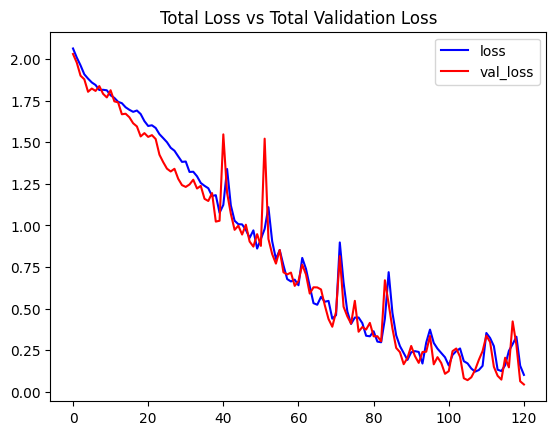

In [31]:
# Plot the training and validation loss metrics for visualization.
plot_metric(LSTM_model_history, 'loss', 'val_loss', 'Total Loss vs Total Validation Loss')

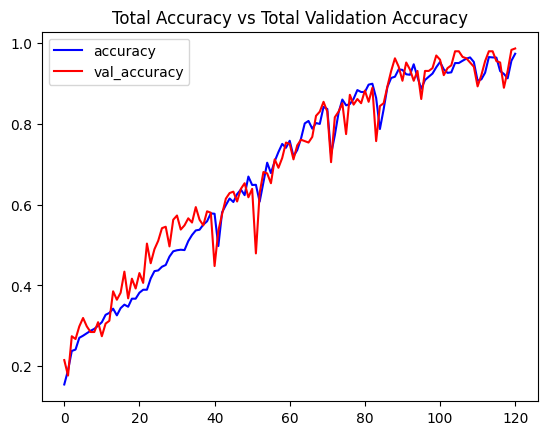

In [32]:
# Plot the training and validation loss metrics for visualization.
plot_metric(LSTM_model_history, 'accuracy', 'val_accuracy', 'Total Accuracy vs Total Validation Accuracy')

In [33]:
model_evaluation_history = LSTM_model.evaluate(np.expand_dims(ravdess_speech_data_array[training_samples + validation_samples:], -1), 
                                               labels_categorical[training_samples + validation_samples:])

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9809 - loss: 0.0524 


In [34]:
import datetime as dt

# Retrieve loss and accuracy from the model evaluation history.
model_evaluation_loss, model_evaluation_accuracy = model_evaluation_history

# Define the date and time format.
date_time_format = '%Y_%m_%d_%H_%M_%S'

# Obtain the current date and time.
current_date_time_dt = dt.datetime.now()

# Convert the date and time to a string with the specified format.
current_date_time_string = dt.datetime.strftime(current_date_time_dt, date_time_format)

# Construct a unique file name based on date, time, loss, and accuracy.
model_file_name = f'NEW_LSTM_model_Date_Time_{current_date_time_string}___Loss_{model_evaluation_loss}___Accuracy_{model_evaluation_accuracy}.h5'

# Save the ConvLSTM model with the generated file name.
LSTM_model.save(model_file_name)